<a href="https://colab.research.google.com/github/msinankhan/Data-Extraction-and-Text-Analysis/blob/main/Data_Extraction_and_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is about performing text analysis and exporting the data to an xlsx file.

The text is supposed to be extracted from an xlsx file named 'Input.xlsx' which has various weblinks.

Here's a snapshot of the Input.xlsx:

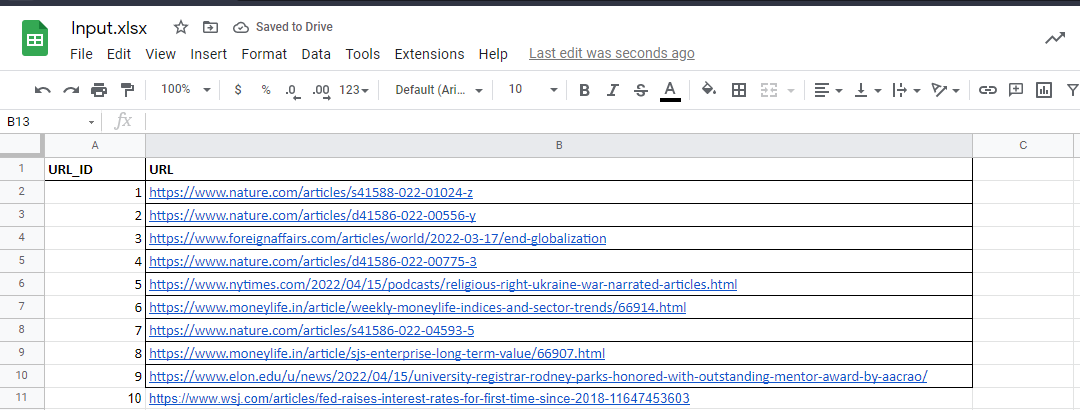




####**Newspaper** is a **Python module** used for extracting and parsing text articles. The Newspaper module uses advance algorithms with web scraping to extract all the useful text from a website. It is necessary to pip install the package before importing the same.

In [ ]:
 !pip install newspaper3k

#### The following are some necessary imports to make.

In [ ]:
import pandas as pd
import numpy as np
import os
import nltk
import string
import re
import nltk
import newspaper
from newspaper import Article
from pathlib import Path
from newspaper import Config
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In a general text analysis using **NLP**, it is essential to get rid of words and symbols that don't necessarily add value to the analysis that we intend to do.

The following three functions: remove_punc(), remove_stpwd, tokenize(), remove the punctuation, remove stopwords, and  tokenize the text respectively.

**Note**: Stop words are words like "a", "the", "I", "my" etc.

In [ ]:
def remove_punc(dmf):
    global nopunc
    nopunc = [char for char in dmf if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [ ]:
def remove_stpwd(nopunc):
    global clean_mess
    clean_mess = [word for word in nopunc.split() if word.lower() not in stpwrd]
    clean_mess=' '.join(clean_mess)
    return clean_mess

In [ ]:
def tokenize(clean_mess):
    global tokens
    tokens = word_tokenize(clean_mess.upper())
    
    return tokens

The following function **neg_words()**, counts the number of negative words present in the given text by referencing the text in the custom made negative word dictionary (negdict.txt).

In [ ]:
def neg_words(tokens):
    global num_neg
    file = open('negdict.txt', 'r')
    neg_words = file.read().split()
    
    num_neg=0
    for n in range(len(tokens)):
        words=str(tokens[n])
        if words in neg_words:
            num_neg=num_neg+1
    return num_neg


The following function **pos_words()**, counts the number of positive words present in the given text by referencing the text in the custom made positive word dictionary (posdict.txt).

In [ ]:
def pos_words(tokens):
    global num_pos
    file = open('posdict.txt', 'r')
    pos_words = file.read().split()
    num_pos=0
    for n in range(len(tokens)):
        words=str(tokens[n])
        if words in pos_words:
            num_pos=num_pos+1
    return num_pos

**Polarity Score:** This is the score that determines if a given text is positive or negative in nature. It is calculated by using the formula: 

Polarity Score = (Positive Score – Negative Score)/ ((Positive Score + Negative Score) + 0.000001)


In [ ]:
def polarity_sc(num_pos, num_neg):
    global polarity
    polarity=(num_pos-num_neg)/((num_pos+num_neg)+0.000001)
    return polarity

**Subjectivity Score:** This score determines if the given text is objective or subjective. 

Subjectivity Score = (Positive Score + Negative Score)/ ((Total Words after cleaning) + 0.000001)


In [ ]:
def subjectivity_sc(num_pos, num_neg,tokens):
    global subjectivity
    subjectivity=(num_pos+num_neg)/(len(tokens)+0.000001)
    return subjectivity

 **Average Sentence Length** is the ratio of number of words to the number of sentences.

**Average Sentence Length** = the number of words / the number of sentences


In [ ]:
def avgsent_len(dmf):
    global avg_sent_len
    text = dmf
    sent=sent_tokenize(dmf)
    avg_sent_len=(len(dmf.split()))/(len(sent))
    return avg_sent_len


**Complex words** are words in the text that contain more than two syllables.

**Percentage of Complex words** = the number of complex words / the number of words

In [ ]:
def complex_words_percent(dmf):
    global complex_wrd
    global complex_per
    complex_wrd=0
    wrd=dmf.split()
    for i in wrd:
        if len(i)>2:
            complex_wrd=complex_wrd+1
    complex_per=complex_wrd/len(wrd)
    return complex_per


**Fog index** is  a readability test for English writing. The index estimates the years of formal education a person needs to understand the text on the first reading.

**Fog Index** = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [ ]:
def fog_index(avg_sent_len,complex_per):
    global fogind
    fogind=0.4*(avg_sent_len+complex_per)
    return fogind

**Average Number of Words Per Sentence** = the total number of words / the total number of sentences


In [ ]:
def avg_wrds_in_sent(dmf):
    global avg_wrds_per_sent
    totwrd=len(dmf.split())
    totsent=(len(sent_tokenize(dmf)))
    avg_wrds_per_sent=totwrd/totsent
             
    return avg_wrds_per_sent

**Complex words** are words in the text that contain more than two syllables.



In [ ]:
def complex_wrd_count(dmf):
    global complex_wrds
    complex_wrds=0
    words=dmf.split()
    for i in words:
        if len(i)>2:
            complex_wrds=complex_wrds+1
    return complex_wrds

We count the **total cleaned words** present in the text by 
1. removing the stop words (using stopwords class of nltk package).
2. removing any punctuations like ? ! , . from the word before counting.


In [ ]:
def word_count(clean_mess):
    global wrd_cnt
    wrd_cnt=len((clean_mess.split()))
    return wrd_cnt

We count the **number of Syllables** in each word of the text by counting the vowels present in each word.

We also handle some exceptions like words ending with "es","ed" by not counting them as a syllable.


In [ ]:
def syllable_count(dmf):
    global syl_count
    text = dmf
    syl_count = 0
    vowels = "aeiou"
    for word in text.lower().split():
        #print(word)
        if word[0] in vowels:
            syl_count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                syl_count += 1
        if word.endswith("ed") or word.endswith("es"):
            syl_count -= 1
    return syl_count

To calculate **Personal Pronouns** mentioned in the text, we find the counts of the words - “I,” “we,” “my,” “ours,” and “us”. 

Special care is taken so that the country name US is not included in the list.

In [ ]:
def personal_pronoun(dmf):
    global personal_pro
    pronounRegex = re.compile(r'\bI\b|\bwe\b|\bWe\b|\bmy\b|\bMy\b|\bours\b|\bus\b')
    pps=pronounRegex.findall(dmf)
    personal_pro=len(pps)
    return personal_pro

**Average Word Length** :  is the ratio of Sum of the total **number of characters** in each word to Total number of words


In [ ]:
def avg_wrd_length(dmf):
    global avg_wrdlen
    alltxt=dmf
    wrd_cnt=0
    char_cnt=0
    for word in alltxt:
        if word!= ' ':
            char_cnt=wrd_cnt+1
    totalchar=char_cnt
    for word in alltxt.split():
        wrd_cnt=wrd_cnt+1
    totalwrds=wrd_cnt
    avg_wrdlen=totalchar/totalwrds
    return avg_wrdlen

We can use the read_excel() method in pandas to read the contents of the xlsx file. 

In [ ]:
df=pd.read_excel('Input.xlsx')

We can drop null values using the dropna() method.

In [ ]:
df=df.dropna(axis=1)

The following code is necessary to increase the time-out to prevent 'read timed out' error 

In [ ]:
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
config = Config()
config.browser_user_agent = USER_AGENT
config.request_timeout = 40

The following for loop parses through each url in the xlsx file, downloads the title and the body. Then it finally appends the text in the text file

In [ ]:
for n in range(len(df)):
    urlm=df['URL'][n]
    article=Article(urlm, config=config)
    article.download()
    article.parse()
    art=article.title
    art2=article.text
    p = Path(str(df['URL_ID'][n])+'.txt')
    p=  open(str(df['URL_ID'][n])+'.txt', 'a',encoding='utf-8')   
    p.write(art)
    p = open(str(df['URL_ID'][n])+'.txt', 'a',encoding='utf-8')
    p.write('\n \n')
    p.write(art2)
    p.close()
    

In [ ]:
stpwrd = nltk.corpus.stopwords.words('english')

In [ ]:
file2=open('StopWords_Auditor.txt')
file2=file2.read().split('\n')

We can add additional stop words to the corpus using the .extend() method as follows

In [ ]:
stpwrd.extend(file2)

The following dictionary was downloaded from :
https://sraf.nd.edu/

In [ ]:
mst_dict=pd.read_csv('LoughranMcDonald_MasterDictionary_2020.csv')

I've created a positive word and a negative word dictionary using the positive and negative score from the mst_dict respectively.

In [ ]:
mst_dict['neg_wrd'] = mst_dict.loc[mst_dict['Negative'] == 2009]['Word']
mst_dict['pos_wrd'] = mst_dict.loc[mst_dict['Positive'] == 2009]['Word']

In [ ]:
for n in range(len(mst_dict['neg_wrd'])):
    word=str(mst_dict['neg_wrd'][n])
    if word!='nan':
        p=open('negdict.txt','a')
        p.write(word +' ')

for n in range(86531):
    word=str(mst_dict['pos_wrd'][n])
    if word!='nan':
        p=open('posdict.txt','a')
        p.write(word +' ')

The alldata dictionary will hold the values and scores of the parameters

In [ ]:
alldata={ 'URL_ID':[],
          'URL':[],
          'POSITIVE SCORE':[],
          'NEGATIVE SCORE':[],
          'POLARITY SCORE':[],
          'SUBJECTIVITY SCORE':[],
          'AVG SENTENCE LENGTH':[],
          'PERCENTAGE OF COMPLEX WORDS':[],
          'FOG INDEX':[],
          'AVG NUMBER OF WORDS PER SENTENCE':[],
          'COMPLEX WORD COUNT':[],
          'WORD COUNT':[],
          'SYLLABLE PER WORD':[],
          'PERSONAL PRONOUNS':[],
          'AVG WORD LENGTH':[]
        }


And finally, The main function......

In [ ]:
for n in range(len(df)):
    file=open(str(df['URL_ID'][n])+'.txt', 'r',encoding='utf-8')
    dmf=file.read()
    l=df['URL'][n]
    alldata['URL'].append(l)
    remove_punc(dmf)
    remove_stpwd(nopunc)
    tokenize( clean_mess)
    neg_words(tokens)
    pos_words(tokens)
    polarity_sc(num_pos, num_neg)
    subjectivity_sc(num_pos, num_neg,tokens)
    avgsent_len(dmf)
    complex_words_percent(dmf)
    fog_index(avg_sent_len,complex_per)
    avg_wrds_in_sent(dmf)
    complex_wrd_count(dmf)
    word_count(clean_mess)
    syllable_count(dmf)
    personal_pronoun(dmf)
    avg_wrd_length(dmf) 
    alldata['URL_ID'].append(n)   
    alldata['NEGATIVE SCORE'].append(num_neg)
    alldata['POSITIVE SCORE'].append(num_pos)
    alldata['POLARITY SCORE'].append(polarity)
    alldata['SUBJECTIVITY SCORE'].append(subjectivity)
    alldata['AVG SENTENCE LENGTH'].append(avg_sent_len)
    alldata['PERCENTAGE OF COMPLEX WORDS'].append(complex_per)
    alldata['FOG INDEX'].append(fogind)
    alldata['AVG NUMBER OF WORDS PER SENTENCE'].append(avg_wrds_per_sent)
    alldata['COMPLEX WORD COUNT'].append(complex_wrds)
    alldata['WORD COUNT'].append(wrd_cnt)
    alldata['SYLLABLE PER WORD'].append(syl_count)
    alldata['PERSONAL PRONOUNS'].append(personal_pro)
    alldata['AVG WORD LENGTH'].append(avg_wrdlen)

To export the data to an excel file, I've converted it into a pandas dataframe

In [ ]:
exceldata=pd.DataFrame(alldata)

And finally, Export the data to the output excel......

In [ ]:
file_name = 'Output.xlsx'
exceldata.to_excel(file_name,index=False)

VOILAAA...

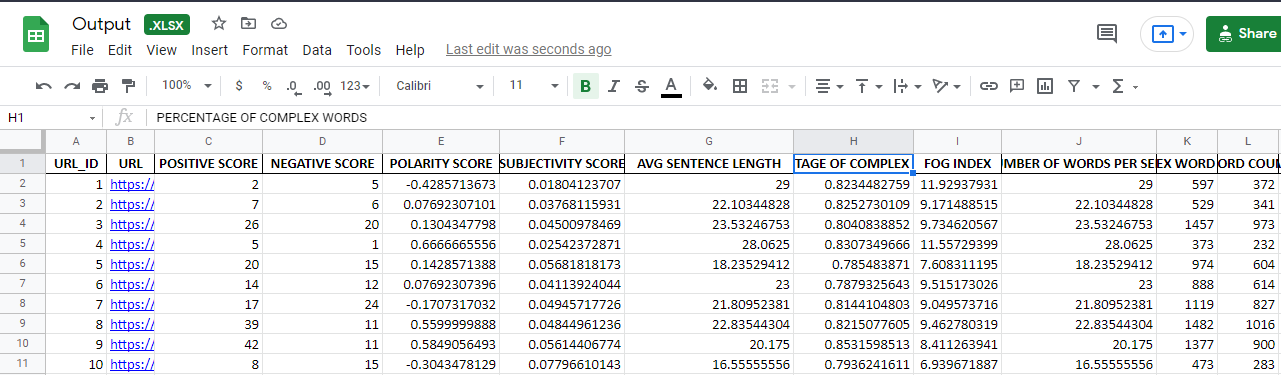
